## Electric vehicle


In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
pd.set_option('display.max_rows', None)

In [36]:
df=pd.read_csv(r"C:\Users\adhiy\OneDrive\Desktop\great learninig\dataset.csv")
df.head()

,Make,Model,Price,Year,Kilometer,Fuel_Type,Transmission,Location,Color,Owner,Seller_Type,Engine,Max_Power,Max_Torque,Drivetrain,Length,Width,Height,Seating_Capacity,Fuel_Tank_Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [3]:
df.shape

(2059, 20)

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel_Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller_Type         2059 non-null   object 
 11  Engine              2059 non-null   object 
 12  Max_Power           2059 non-null   object 
 13  Max_Torque          2059 non-null   object 
 14  Drivetrain          2059 non-null   object 
 15  Length              2059 non-null   float64
 16  Width 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,2059.0,1.702992e+06,2.419881e+06,49000.0,484999.0,825000.0,1925000.0,35000000.0
Year,2059.0,2.016425e+03,3.363564e+00,1988.0,2014.0,2017.0,2019.0,2022.0
Kilometer,2059.0,5.422471e+04,5.736172e+04,0.0,29000.0,50000.0,72000.0,2000000.0
Length,2059.0,4.271975e+03,4.383420e+02,3099.0,3986.0,4315.0,4620.0,5569.0
Width,2059.0,1.765723e+03,1.337475e+02,1475.0,1695.0,1765.0,1831.0,2220.0
Height,2059.0,1.588107e+03,1.354655e+02,1165.0,1480.0,1541.0,1672.0,1995.0
Seating_Capacity,2059.0,5.296746e+00,8.110295e-01,2.0,5.0,5.0,5.0,8.0
Fuel_Tank_Capacity,2059.0,5.106911e+01,1.519154e+01,15.0,40.0,45.0,60.0,105.0


In [37]:
df = df.rename(columns={'Fuel Type':'Fuel_Type','Seller Type':'Seller_Type','Max Power':'Max_Power','Max Torque':'Max_Torque',
                       'Seating Capacity':'Seating_Capacity','Fuel Tank Capacity':'Fuel_Tank_Capacity'})


In [8]:
df

,Make,Model,Price,Year,Kilometer,Fuel_Type,Transmission,Location,Color,Owner,Seller_Type,Engine,Max_Power,Max_Torque,Drivetrain,Length,Width,Height,Seating_Capacity,Fuel_Tank_Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


### Filling Nulls

In [38]:
df['Engine'] = df['Engine'].fillna(df['Engine'].mode()[0])
df['Max_Power'] = df['Max_Power'].fillna(df['Max_Power'].mode()[0])
df['Max_Torque'] = df['Max_Torque'].fillna(df['Max_Torque'].mode()[0])
df['Drivetrain'] = df['Drivetrain'].fillna(df['Drivetrain'].mode()[0])
df['Length'] = df['Length'].fillna(df['Length'].mode()[0])
df['Width'] = df['Width'].fillna(df['Width'].mode()[0])
df['Height'] = df['Height'].fillna(df['Height'].mode()[0])
df['Seating_Capacity']=df['Seating_Capacity'].fillna(df['Seating_Capacity'].mode()[0])
df['Fuel_Tank_Capacity']=df['Fuel_Tank_Capacity'].fillna(df['Fuel_Tank_Capacity'].mode()[0])

In [39]:
df.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel_Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller_Type           0
Engine                0
Max_Power             0
Max_Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating_Capacity      0
Fuel_Tank_Capacity    0
dtype: int64

In [40]:
dataset=df

In [41]:
dataset.to_csv(r'C:\Users\adhiy\OneDrive\Desktop\great learninig\dataset_new.csv',index=False)

### Label encoding of "Make" column

In [42]:
df['Make'] = df['Make'].replace('Jeep','others')
df['Make'] = df['Make'].replace('Jaguar','others')
df['Make'] = df['Make'].replace('MG','others')
df['Make'] = df['Make'].replace('Nissan','others')
df['Make'] = df['Make'].replace('Volvo','others')
df['Make'] = df['Make'].replace('Porsche','others')
df['Make'] = df['Make'].replace('MINI','others')
df['Make'] = df['Make'].replace('Datsun','others')
df['Make'] = df['Make'].replace('Lexus','others')
df['Make'] = df['Make'].replace('Mitsubishi','others')
df['Make'] = df['Make'].replace('Ssangyong','others')
df['Make'] = df['Make'].replace('Chevrolet','others')
df['Make'] = df['Make'].replace('Rolls-Royce','others')
df['Make'] = df['Make'].replace('Isuzu','others')
df['Make'] = df['Make'].replace('Fiat','others')
df['Make'] = df['Make'].replace('Maserati','others')
df['Make'] = df['Make'].replace('Lamborghini','others')
df['Make'] = df['Make'].replace('Ferrari','others')

In [43]:
df['Make'] = df['Make'].replace('Maruti Suzuki','0')
df['Make'] = df['Make'].replace('Hyundai','1')
df['Make'] = df['Make'].replace('Mercedes-Benz','2')
df['Make'] = df['Make'].replace('Honda','3')
df['Make'] = df['Make'].replace('Toyota','4')
df['Make'] = df['Make'].replace('Audi','5')
df['Make'] = df['Make'].replace('BMW','6')
df['Make'] = df['Make'].replace('Mahindra','7')
df['Make'] = df['Make'].replace('Tata','8')
df['Make'] = df['Make'].replace('Volkswagen','9')
df['Make'] = df['Make'].replace('Ford','10')
df['Make'] = df['Make'].replace('Renault','11')
df['Make'] = df['Make'].replace('Skoda','12')
df['Make'] = df['Make'].replace('Land Rover','13')
df['Make'] = df['Make'].replace('Kia','14')
df['Make'] = df['Make'].replace('others','15')

### Dropping "Model" column

In [44]:
df.drop('Model',axis=1,inplace=True)

In [45]:
df['Fuel_Type'].value_counts()

Diesel          1049
Petrol           942
CNG               50
Electric           7
LPG                5
Hybrid             3
CNG + CNG          1
Petrol + CNG       1
Petrol + LPG       1
Name: Fuel_Type, dtype: int64

### Label encoding "Fuel_Type" column

In [46]:
df['Fuel_Type'] = df['Fuel_Type'].replace('LPG','others')
df['Fuel_Type'] = df['Fuel_Type'].replace('Hybrid','others')
df['Fuel_Type'] = df['Fuel_Type'].replace('CNG + CNG','others')
df['Fuel_Type'] = df['Fuel_Type'].replace('Petrol + CNG','others')
df['Fuel_Type'] = df['Fuel_Type'].replace('Petrol + LPG','others')

In [47]:
df['Fuel_Type'] = df['Fuel_Type'].replace('Diesel','0')
df['Fuel_Type'] = df['Fuel_Type'].replace('Petrol','1')
df['Fuel_Type'] = df['Fuel_Type'].replace('CNG','2')
df['Fuel_Type'] = df['Fuel_Type'].replace('Electric','3')
df['Fuel_Type'] = df['Fuel_Type'].replace('others','4')

In [48]:
df['Transmission'].value_counts()

Manual       1133
Automatic     926
Name: Transmission, dtype: int64

### Label encoding "Transmission" column

In [49]:
df['Transmission'] = df['Transmission'].replace('Manual','0')
df['Transmission'] = df['Transmission'].replace('Automatic','1')

### Label encoding "Location" column

In [51]:
df['Location']=df['Location'].replace('Raipur','others')
df['Location']=df['Location'].replace('Thane','others')
df['Location']=df['Location'].replace('Navi Mumbai','others')
df['Location']=df['Location'].replace('Agra','others')
df['Location']=df['Location'].replace('Zirakpur','others')
df['Location']=df['Location'].replace('Noida','others')
df['Location']=df['Location'].replace('Karnal','others')
df['Location']=df['Location'].replace('Ambala Cantt','others')
df['Location']=df['Location'].replace('Jamshedpur','others')
df['Location']=df['Location'].replace('Nashik','others')
df['Location']=df['Location'].replace('Surat','others')
df['Location']=df['Location'].replace('Udupi','others')
df['Location']=df['Location'].replace('Mysore','others')
df['Location']=df['Location'].replace('Meerut','others')
df['Location']=df['Location'].replace('Indore','others')
df['Location']=df['Location'].replace('Bhopal','others')
df['Location']=df['Location'].replace('Guwahati','others')
df['Location']=df['Location'].replace('Yamunanagar','others')
df['Location']=df['Location'].replace('Mangalore','others')
df['Location']=df['Location'].replace('Vadodara','others')
df['Location']=df['Location'].replace('Salem','others')
df['Location']=df['Location'].replace('Panchkula','others')
df['Location']=df['Location'].replace('Bhubaneswar','others')
df['Location']=df['Location'].replace('Mirzapur','others')
df['Location']=df['Location'].replace('Allahabad','others')
df['Location']=df['Location'].replace('Aurangabad','others')
df['Location']=df['Location'].replace('Amritsar','others')
df['Location']=df['Location'].replace('Goa','others')
df['Location']=df['Location'].replace('Dharwad','others')
df['Location']=df['Location'].replace('Warangal','others')
df['Location']=df['Location'].replace('Roorkee','others')
df['Location']=df['Location'].replace('Rudrapur','others')
df['Location']=df['Location'].replace('Panvel','others')
df['Location']=df['Location'].replace('Nagpur','others')
df['Location']=df['Location'].replace('Ghaziabad','others')
df['Location']=df['Location'].replace('Bulandshahar','others')
df['Location']=df['Location'].replace('Ranga Reddy','others')
df['Location']=df['Location'].replace('Dak. Kannada','others')
df['Location']=df['Location'].replace('Kota','others')
df['Location']=df['Location'].replace('Muzaffurpur','others')
df['Location']=df['Location'].replace('Deoghar','others')
df['Location']=df['Location'].replace('Gorakhpur','others')
df['Location']=df['Location'].replace('Kharar','others')
df['Location']=df['Location'].replace('Haldwani','others')
df['Location']=df['Location'].replace('Ernakulam','others')
df['Location']=df['Location'].replace('Kollam','others')
df['Location']=df['Location'].replace('Kheda','others')
df['Location']=df['Location'].replace('Purnea','others')
df['Location']=df['Location'].replace('Unnao','others')
df['Location']=df['Location'].replace('Samastipur','others')
df['Location']=df['Location'].replace('Faizabad','others')
df['Location']=df['Location'].replace('Pimpri-Chinchwad','others')
df['Location']=df['Location'].replace('Rohtak','others')
df['Location']=df['Location'].replace('Valsad','others')
df['Location']=df['Location'].replace('Siliguri','others')

In [52]:
df['Location']=df['Location'].replace('Mumbai','0')
df['Location']=df['Location'].replace('Delhi','1')
df['Location']=df['Location'].replace('Pune','2')
df['Location']=df['Location'].replace('Bangalore','3')
df['Location']=df['Location'].replace('Hyderabad','4')
df['Location']=df['Location'].replace('Lucknow','5')
df['Location']=df['Location'].replace('Ahmedabad','6')
df['Location']=df['Location'].replace('Chennai','7')
df['Location']=df['Location'].replace('Kolkata','8')
df['Location']=df['Location'].replace('Kanpur','9')
df['Location']=df['Location'].replace('Patna','10')
df['Location']=df['Location'].replace('Ludhiana','11')
df['Location']=df['Location'].replace('Mohali','12')
df['Location']=df['Location'].replace('Gurgaon','13')
df['Location']=df['Location'].replace('Jaipur','14')
df['Location']=df['Location'].replace('Coimbatore','15')
df['Location']=df['Location'].replace('Ranchi','16')
df['Location']=df['Location'].replace('Chandigarh','17')
df['Location']=df['Location'].replace('Dehradun','18')
df['Location']=df['Location'].replace('Faridabad','19')
df['Location']=df['Location'].replace('Varanasi','20')
df['Location']=df['Location'].replace('Jalandhar','21')
df['Location']=df['Location'].replace('others','22')

### label encoding "Color" column

In [53]:
df['Color']=df['Color'].replace('Green','others')
df['Color']=df['Color'].replace('Orange','others')
df['Color']=df['Color'].replace('Others','others')
df['Color']=df['Color'].replace('Yellow','others')
df['Color']=df['Color'].replace('Beige','others')
df['Color']=df['Color'].replace('Purple','others')
df['Color']=df['Color'].replace('Pink','others')

In [54]:
df['Color']=df['Color'].replace('White','0')
df['Color']=df['Color'].replace('Silver','1')
df['Color']=df['Color'].replace('Grey','2')
df['Color']=df['Color'].replace('Blue','3')
df['Color']=df['Color'].replace('Black','4')
df['Color']=df['Color'].replace('Red','5')
df['Color']=df['Color'].replace('Brown','6')
df['Color']=df['Color'].replace('Maroon','7')
df['Color']=df['Color'].replace('Gold','8')
df['Color']=df['Color'].replace('Bronze','9')
df['Color']=df['Color'].replace('others','10')

### Label encoding "Owner"  column

In [55]:
df['Owner']=df['Owner'].replace('UnRegistered Car','others')
df['Owner']=df['Owner'].replace('Fourth','others')
df['Owner']=df['Owner'].replace('4 or More','others')

In [56]:
df['Owner']=df['Owner'].replace('First','0')
df['Owner']=df['Owner'].replace('Second','1')
df['Owner']=df['Owner'].replace('Third','2')
df['Owner']=df['Owner'].replace('others','3')

### Label encoding "Seller_Type" column

In [57]:
df['Seller_Type']=df['Seller_Type'].replace('Individual','0')
df['Seller_Type']=df['Seller_Type'].replace('Corporate','1')
df['Seller_Type']=df['Seller_Type'].replace('Commercial Registration','2')

### Extracting text from column values

In [58]:
df['Engine'] = df['Engine'].str.extract('(\d+)')

In [59]:
df['bhp'] = df['Max_Power'].str.extract('(\d+) bhp', expand=False)
df['rpm'] = df['Max_Power'].str.extract('@ (\d+) rpm', expand=False)

In [60]:
df['Nm'] = df['Max_Torque'].str.extract('(\d+) Nm', expand=False)
df['T.rpm'] = df['Max_Torque'].str.extract('@ (\d+) rpm', expand=False)

In [61]:
df.drop(['Max_Power','Max_Torque'],axis=1,inplace=True)

### Label encoding "Drivetrain" column

In [62]:
df['Drivetrain']=df['Drivetrain'].replace('FWD','0')
df['Drivetrain']=df['Drivetrain'].replace('RWD','1')
df['Drivetrain']=df['Drivetrain'].replace('AWD','2')

### filling nulls in newly created columns

In [63]:
df['bhp']=df['bhp'].fillna(df['bhp'].mode()[0])
df['rpm']=df['rpm'].fillna(df['rpm'].mode()[0])
df['Nm']=df['Nm'].fillna(df['Nm'].mode()[0])
df['T.rpm']=df['T.rpm'].fillna(df['T.rpm'].mode()[0])

### converting to integer datatype

In [64]:
df['Make']=df['Make'].astype('int64')
df['Fuel_Type']=df['Fuel_Type'].astype('int64')
df['Transmission']=df['Transmission'].astype('int64')
df['Location']=df['Location'].astype('int64')
df['Color']=df['Color'].astype('int64')
df['Owner']=df['Owner'].astype('int64')
df['Seller_Type']=df['Seller_Type'].astype('int64')
df['Engine']=df['Engine'].astype('int64')
df['Drivetrain']=df['Drivetrain'].astype('int64')
df['bhp']=df['bhp'].astype('int64')
df['rpm']=df['rpm'].astype('int64')
df['Nm']=df['Nm'].astype('int64')
df['T.rpm']=df['T.rpm'].astype('int64')

### K Means Clustering

In [66]:
from sklearn.cluster import KMeans
wss=[]
dictionary={}
for i in range(1,22):
    k_means=KMeans(n_clusters=i,random_state=1234)
    k_means.fit_transform(df)
    wss.append(k_means.inertia_)
    dictionary[str(i)] = k_means
wss
dictionary

{'1': KMeans(n_clusters=1, random_state=1234),
 '2': KMeans(n_clusters=2, random_state=1234),
 '3': KMeans(n_clusters=3, random_state=1234),
 '4': KMeans(n_clusters=4, random_state=1234),
 '5': KMeans(n_clusters=5, random_state=1234),
 '6': KMeans(n_clusters=6, random_state=1234),
 '7': KMeans(n_clusters=7, random_state=1234),
 '8': KMeans(random_state=1234),
 '9': KMeans(n_clusters=9, random_state=1234),
 '10': KMeans(n_clusters=10, random_state=1234),
 '11': KMeans(n_clusters=11, random_state=1234),
 '12': KMeans(n_clusters=12, random_state=1234),
 '13': KMeans(n_clusters=13, random_state=1234),
 '14': KMeans(n_clusters=14, random_state=1234),
 '15': KMeans(n_clusters=15, random_state=1234),
 '16': KMeans(n_clusters=16, random_state=1234),
 '17': KMeans(n_clusters=17, random_state=1234),
 '18': KMeans(n_clusters=18, random_state=1234),
 '19': KMeans(n_clusters=19, random_state=1234),
 '20': KMeans(n_clusters=20, random_state=1234),
 '21': KMeans(n_clusters=21, random_state=1234)}

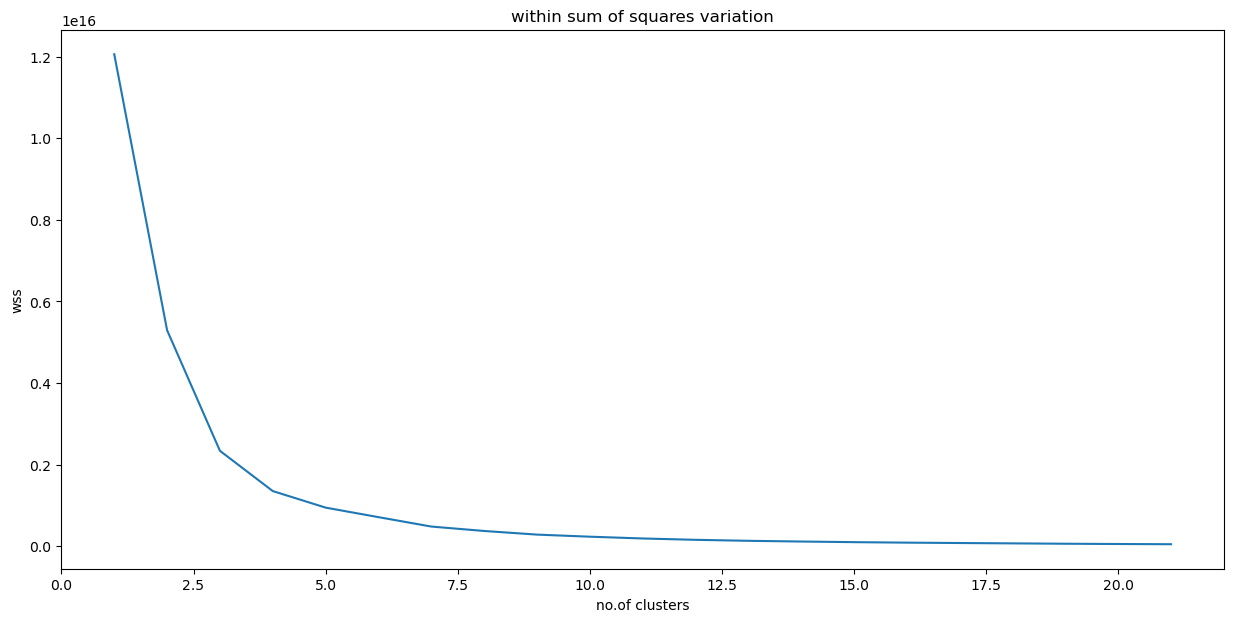

In [67]:
plt.figure(figsize=(15,7))
plt.plot(range(1,22),wss);
plt.xlabel("no.of clusters");
plt.ylabel("wss");
plt.title("within sum of squares variation");

### Global stability analysis¶

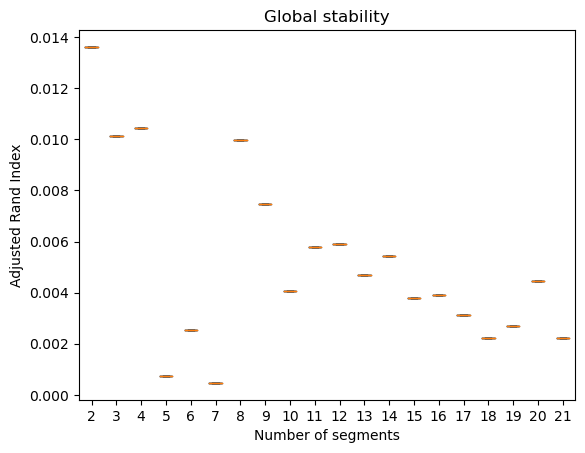

In [80]:
np.random.seed(1234) 
nboot = 100  
nrep = 10  
bootstrap_samples = []
for i in range(nboot):
    bootstrap_sample = resample(df.values, random_state=1234) 
    bootstrap_samples.append(bootstrap_sample)
adjusted_rand_index = []
num_segments = range(2, 22)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        k_means = KMeans(n_clusters=k, n_init=nrep, random_state=1234)  
        k_means.fit(bootstrap_sample)
        cluster_labels = k_means.predict(bootstrap_sample)
        true_labels = k_means.predict(df.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)   
adjusted_rand_index = np.array(adjusted_rand_index).T
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Global stability")
plt.show()

### Segment Level Stability Across Solutions (SLSA) Plot

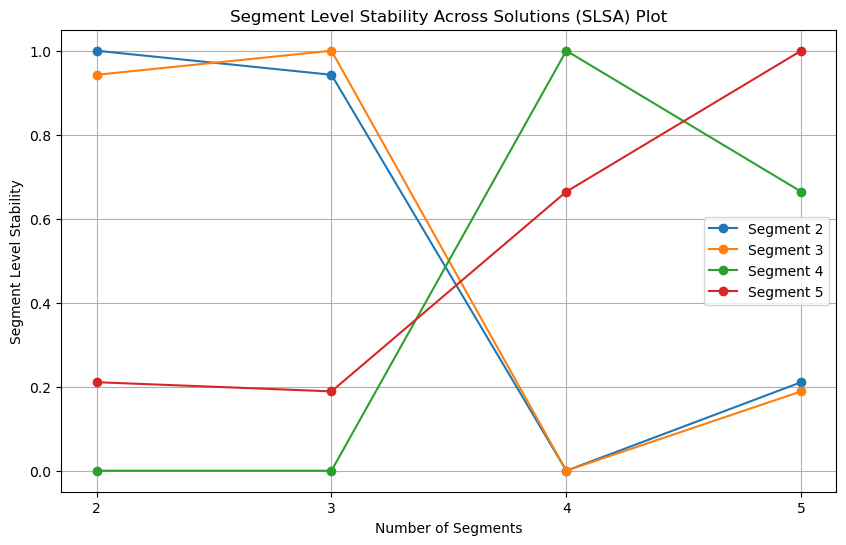

In [68]:
segment_stability = []
num_segments=range(2,6)
for segment in num_segments:
    labels_segment = dictionary[str(segment)].predict(df)
    segment_stability.append(labels_segment)
plt.figure(figsize=(10, 6))
for i, segment in enumerate(num_segments):
    stability_scores = [np.mean(segment_stability[i] == labels) for labels in segment_stability]
    plt.plot(num_segments, stability_scores, marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)
plt.show()


### Segment Level Stability Within Solutions (SLSW) Plot¶

{1: array([1198446.55205735, 1253164.34119727, 1483066.3054059 , ...,
       1463113.90673876, 2587016.17587331, 1033145.92710716]), 2: array([ 579984.91009989,  634452.67185607,  864287.93748647, ...,
        844350.84295432, 2720404.60903239,  414471.36133111]), 3: array([440695.44103606, 495013.46450316, 724812.84741538, ...,
       704881.06771693, 831526.04241853, 275084.7496627 ]), 4: array([274948.56011144, 328853.62973902, 558548.91504716, ...,
       538633.02790149, 967344.3990217 , 109299.70077924]), 5: array([131503.5332324 , 184224.28319578, 413711.26713222, ...,
       393807.99370319, 550571.27729758,  38521.06870912])}


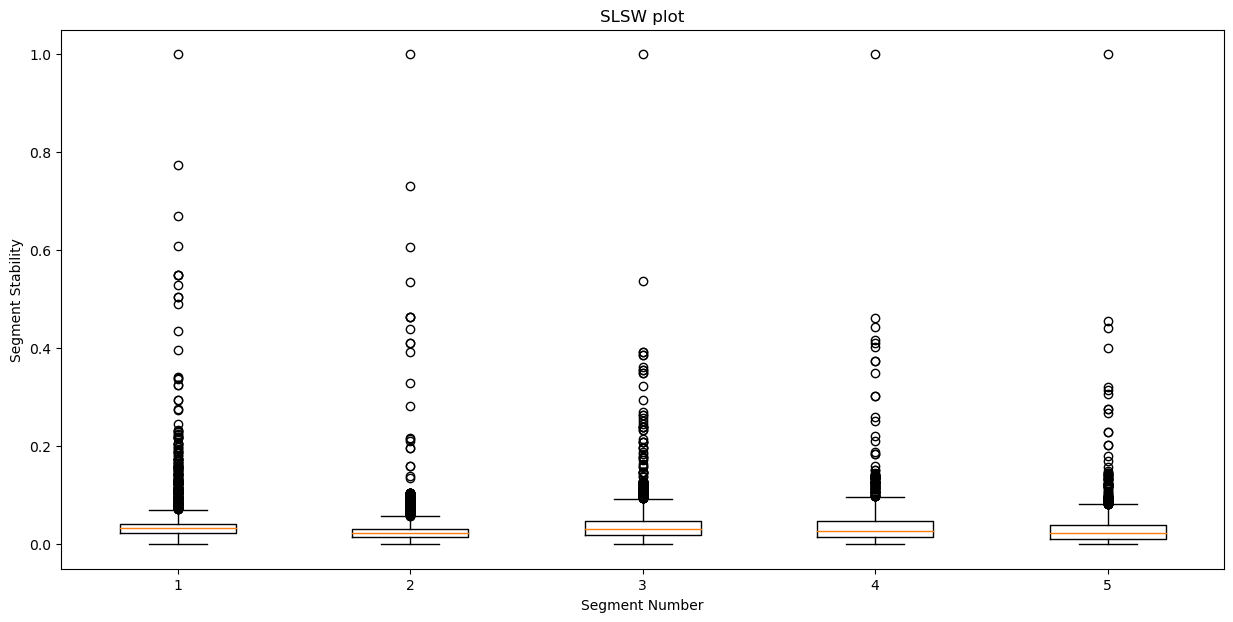

In [69]:
num_segments = range(1, 6)
segment_labels = {}
segment_similarities = {}

for segment in num_segments:
    segment_labels[segment] = dictionary[str(segment)].predict(df)
    segment_similarities[segment] = dictionary[str(segment)].transform(df).min(axis=1)
print(segment_similarities)

segment_stability_values = []
for segment in num_segments:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)

plt.figure(figsize=(15, 7))
plt.boxplot(segment_stability_values)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")

plt.title("SLSW plot")
plt.show()

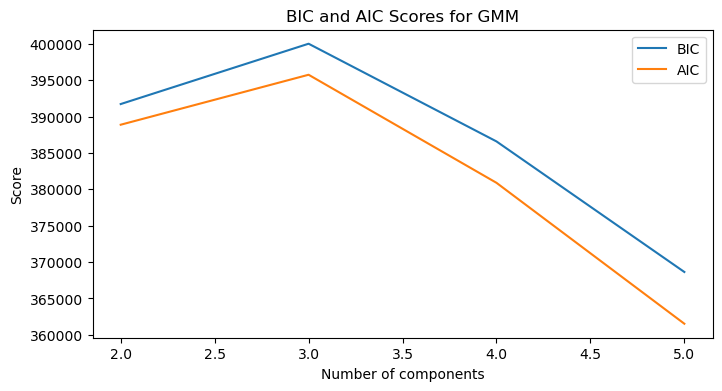

In [70]:
n_components = range(2, 6)
bic_scores = []
aic_scores = []
for k in n_components:
    gmm = GaussianMixture(n_components=k, random_state=1)
    gmm.fit(df)
    bic_scores.append(gmm.bic(df))
    aic_scores.append(gmm.aic(df))
plt.figure(figsize=(8, 4))
plt.plot(n_components, bic_scores, label='BIC')
plt.plot(n_components, aic_scores, label='AIC')
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.legend()
plt.title('BIC and AIC Scores for GMM')
plt.show()

### Cluster profiling

In [75]:
k_means=KMeans(n_clusters=4)
labels=k_means.fit_predict(df)
labels

array([0, 0, 0, ..., 0, 3, 0])

In [76]:
df['clusters']=labels

In [80]:
df['clusters'].value_counts().sort_index()

0    1575
1      13
2     126
3     345
Name: clusters, dtype: int64

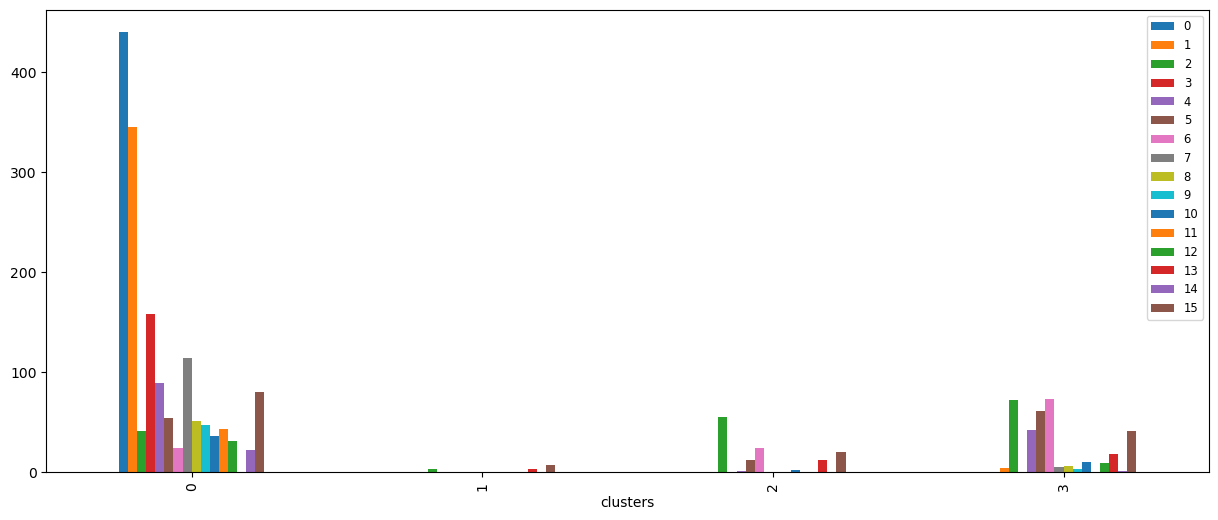

In [101]:
pd.crosstab(df['clusters'],df['Make']).plot(kind='bar',figsize=(15,6))
plt.legend(loc='upper right', fontsize='small')

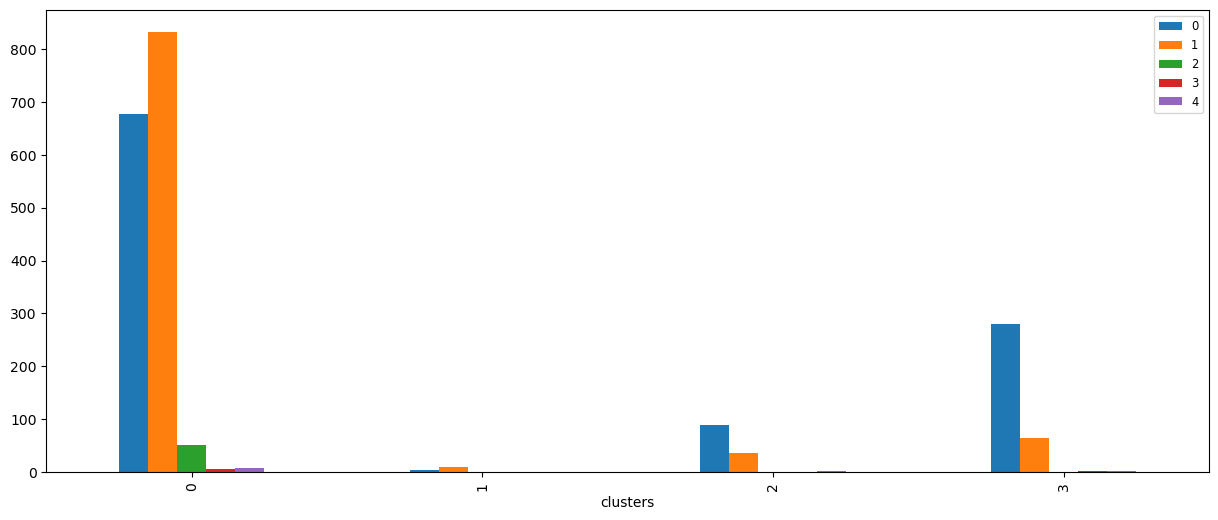

In [102]:
pd.crosstab(df['clusters'],df['Fuel_Type']).plot(kind='bar',figsize=(15,6))
plt.legend(loc='upper right', fontsize='small')

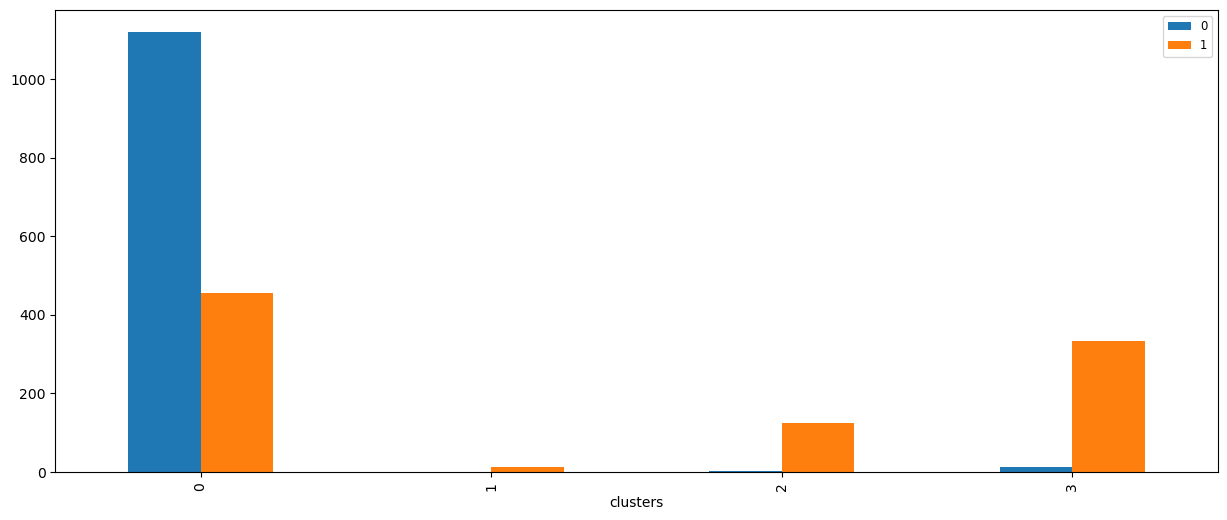

In [103]:
pd.crosstab(df['clusters'],df['Transmission']).plot(kind='bar',figsize=(15,6))
plt.legend(loc='upper right', fontsize='small')

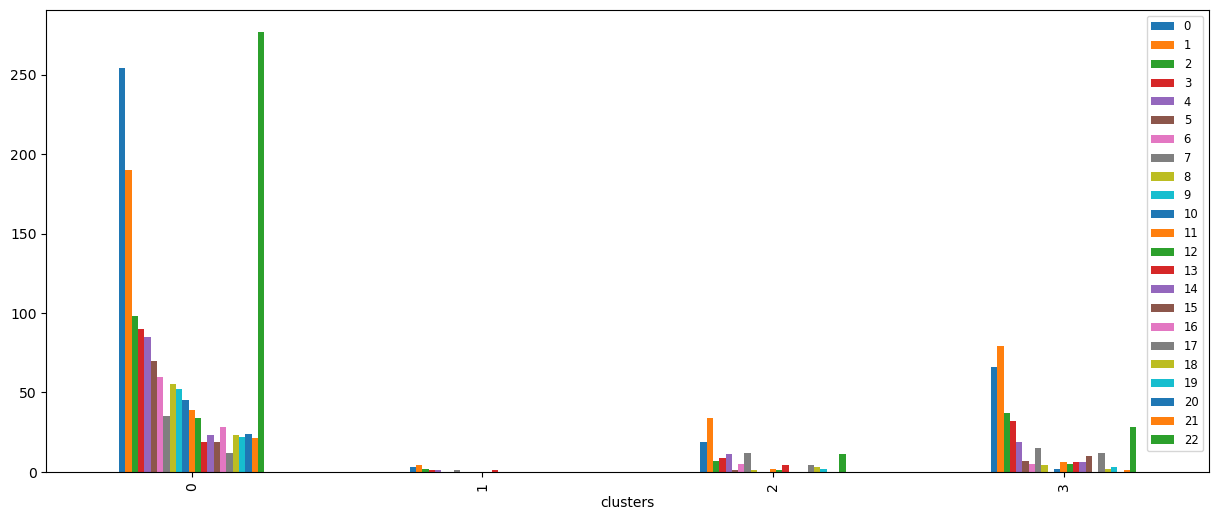

In [104]:
pd.crosstab(df['clusters'],df['Location']).plot(kind='bar',figsize=(15,6))
plt.legend(loc='upper right', fontsize='small')

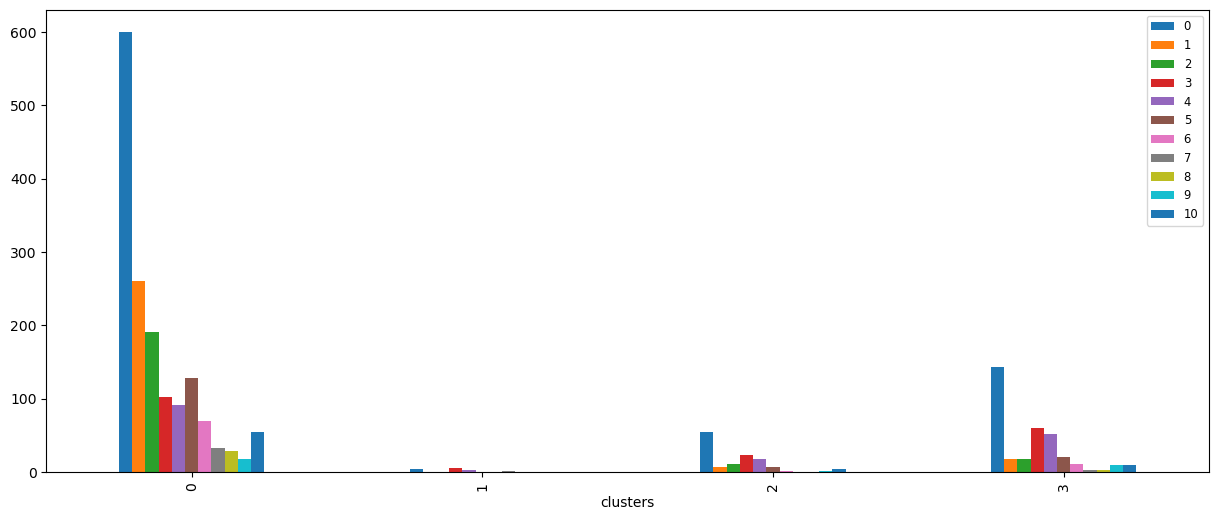

In [105]:
pd.crosstab(df['clusters'],df['Color']).plot(kind='bar',figsize=(15,6))
plt.legend(loc='upper right', fontsize='small')

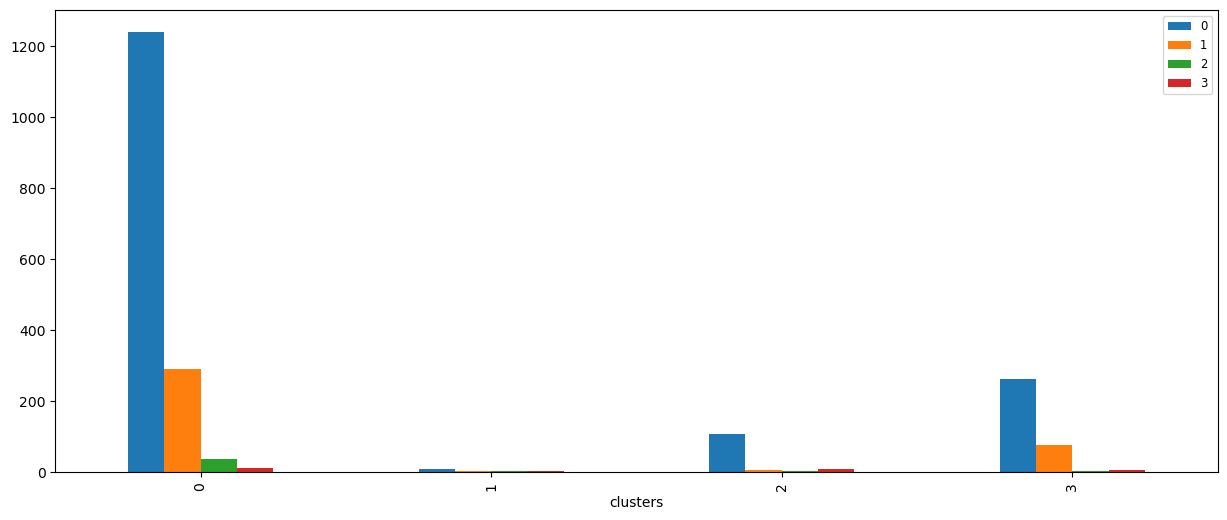

In [106]:
pd.crosstab(df['clusters'],df['Owner']).plot(kind='bar',figsize=(15,6))
plt.legend(loc='upper right', fontsize='small')

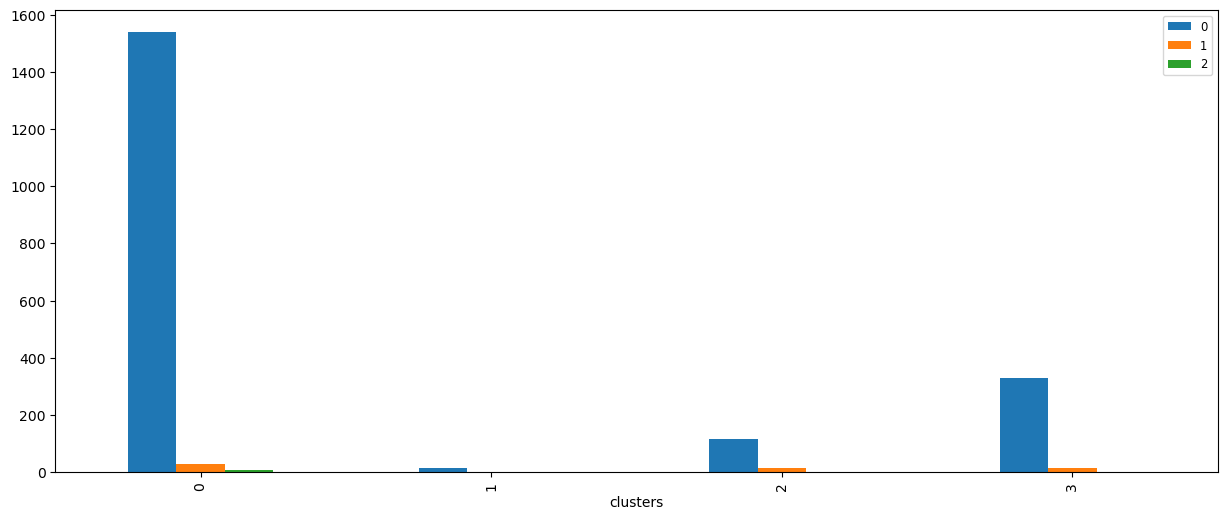

In [110]:
pd.crosstab(df['clusters'],df['Seller_Type']).plot(kind='bar',figsize=(15,6))
plt.legend(loc='upper right', fontsize='small')

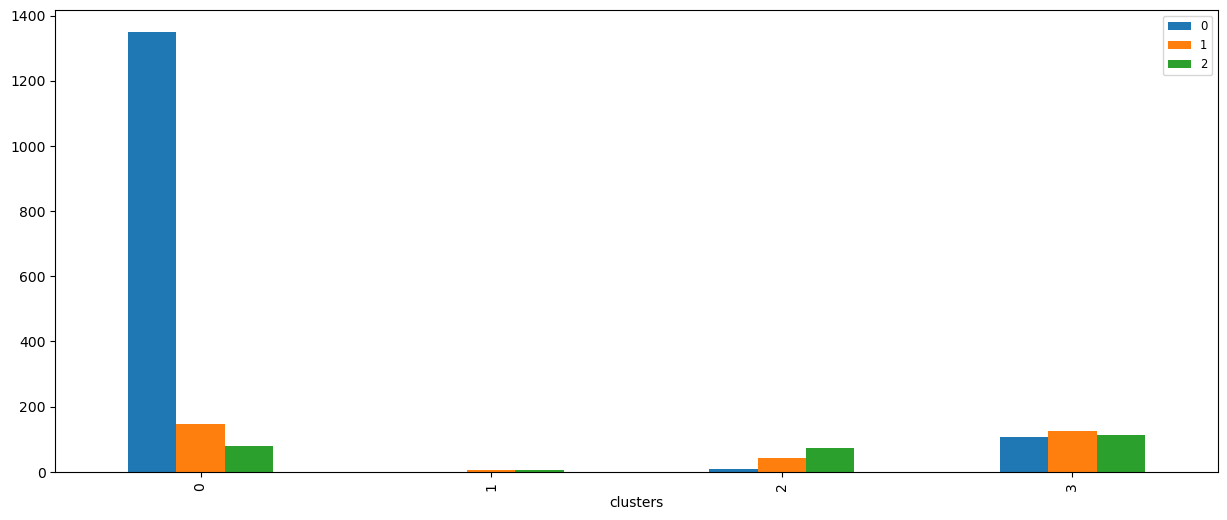

In [111]:
pd.crosstab(df['clusters'],df['Drivetrain']).plot(kind='bar',figsize=(15,6))
plt.legend(loc='upper right', fontsize='small')

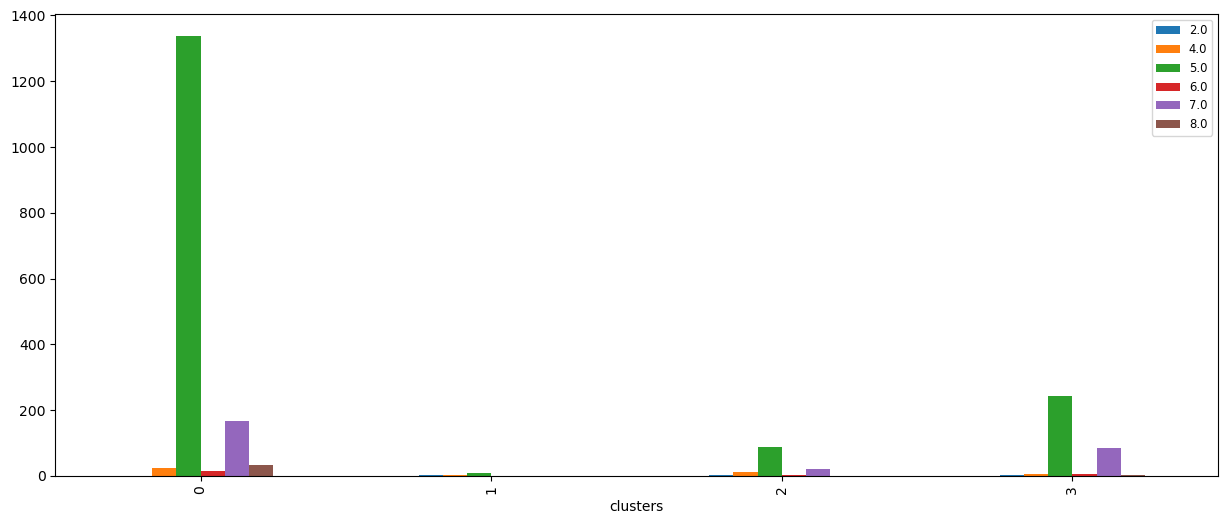

In [112]:
pd.crosstab(df['clusters'],df['Seating_Capacity']).plot(kind='bar',figsize=(15,6))
plt.legend(loc='upper right', fontsize='small')

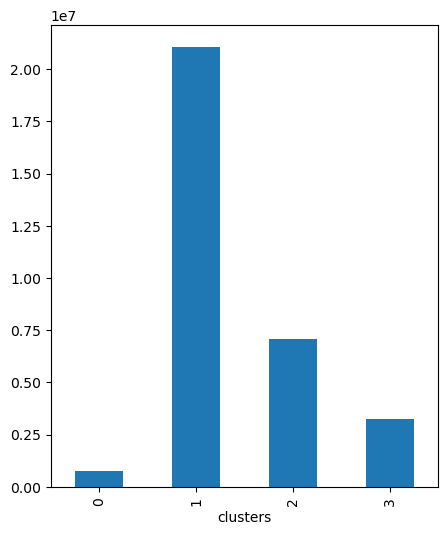

In [123]:
df.groupby(by=['clusters'])['Price'].mean().plot(kind='bar',figsize=(5,6));

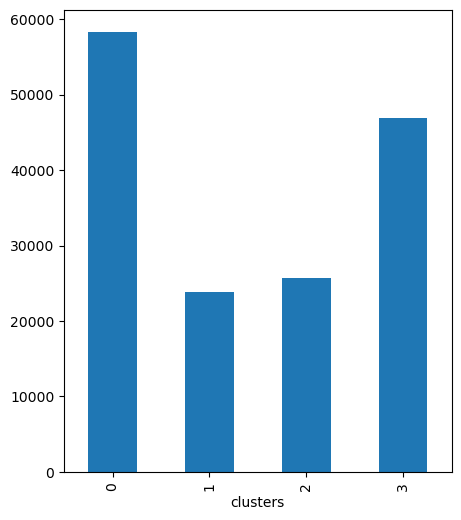

In [124]:
df.groupby(by=['clusters'])['Kilometer'].mean().plot(kind='bar',figsize=(5,6));

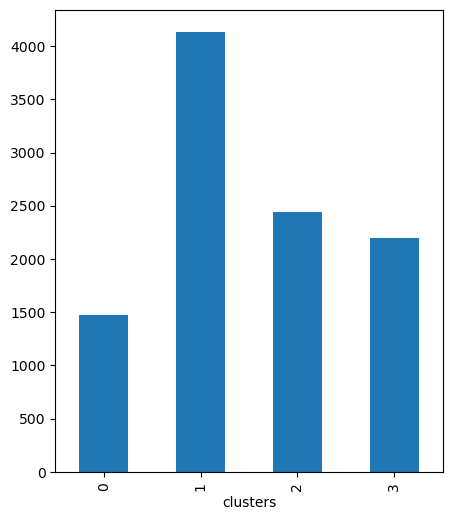

In [125]:
df.groupby(by=['clusters'])['Engine'].mean().plot(kind='bar',figsize=(5,6));

C:\Users\adhiy\AppData\Local\Temp\ipykernel_17144\1552586451.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by=['clusters'])['Length','Width','Height'].mean().plot(kind='bar',figsize=(5,6));


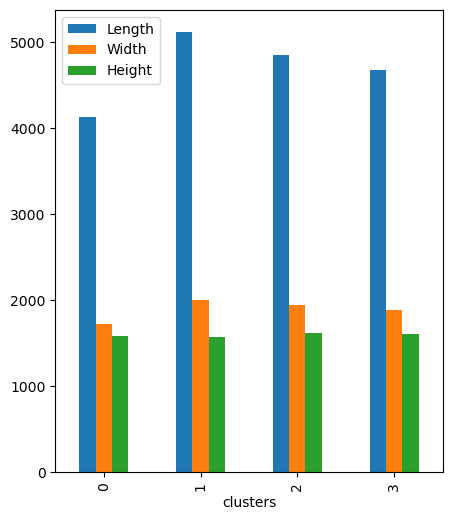

In [126]:
df.groupby(by=['clusters'])['Length','Width','Height'].mean().plot(kind='bar',figsize=(5,6));

C:\Users\adhiy\AppData\Local\Temp\ipykernel_17144\299037826.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by=['clusters'])['bhp','rpm','Nm','T.rpm'].mean().plot(kind='bar',figsize=(5,6));


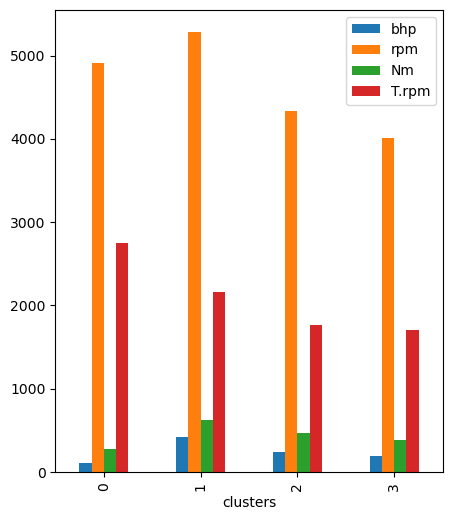

In [127]:
df.groupby(by=['clusters'])['bhp','rpm','Nm','T.rpm'].mean().plot(kind='bar',figsize=(5,6));